# Intro
https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12

The dataset referenced in this paper contains 520 observations and 17 attributes that are collected
using direct questionnaires and diagnosis results from the patients in the Sylhet Diabetes Hospital
in Sylhet, Bangladesh. There are 2 demographic features, Age & Gender; the other 15 attributes
are binary features that indicate whether the patient experienced a symptom

By the due date of milestone report on 10/23, we should be able to reproduce the results from the first
paper. For the milestone report, we will each tackle an algorithm and attempt to reproduce the results
from (Islam et al. 2020). With the exception of Decision Tree/Random Forest, this corresponds with
the material taught on the syllabus.

## Explore

In [73]:
import sklearn

In [74]:
import pandas as pd
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt

sylhet_raw = pd.read_csv("../data/sylhet-dataset.csv")
sylhet_copy = sylhet_raw.copy(deep=True)

In [75]:
sylhet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [76]:
# %pip install --user pandas_profiling

In [77]:
# from pandas_profiling import ProfileReport

In [78]:
# profile = ProfileReport(sylhet_copy)
# profile

In [79]:
sylhet_copy.describe(include="all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
col_names = [x.lower().replace(" ", "_") for x in sylhet_copy.columns]

In [81]:
print(col_names)

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


In [82]:
sylhet_copy.set_axis(col_names, axis=1, inplace=True)

In [83]:
for x in col_names[1:-1]:
    sylhet_copy[x] = sylhet_copy[x].apply(lambda z: 0 if z == "No" else 1)

In [84]:
sylhet_copy.describe(include="all")

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320
mean,48.028846,1.0,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,NaN
std,12.151466,0.0,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,NaN
min,16.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,39.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,47.500000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,57.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN


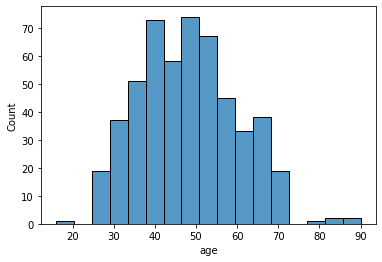

In [85]:
sns.histplot(sylhet_copy, x="age").figure.savefig("age_distribution_histogram.png")
# fig = sns_plot.get_figure()
# fig.savefig("age_distribution_histogram.png")

In [86]:
sylhet_copy["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [87]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

sylhet_copy["class"] = le.fit_transform(sylhet_copy["class"])

In [88]:
sylhet_copy["class"].mean()

0.6153846153846154

In [89]:
sylhet_copy.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [90]:
X = sylhet_copy.age

In [91]:
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [92]:
X_scaled

0      0.324324
1      0.567568
2      0.337838
3      0.391892
4      0.594595
         ...   
515    0.310811
516    0.432432
517    0.567568
518    0.216216
519    0.351351
Name: age, Length: 520, dtype: float64

In [93]:
sylhet_copy["age"] = X_scaled

In [94]:
print(sylhet_copy["age"].min(), sylhet_copy["age"].max())

0.0 1.0


In [95]:
sylhet_copy.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [96]:
print('describe')
sylhet_copy.describe(include="all")

describe


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.432822,1.0,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.164209,0.0,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310811,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425676,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.554054,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


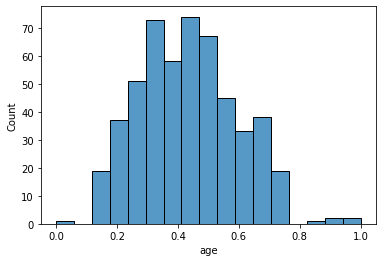

In [97]:
sns.histplot(sylhet_copy, x="age").figure.savefig("age_distribution_histogram_transformed.png")

In [98]:
sylhet_np = sylhet_copy.to_numpy()

In [99]:
sylhet_copy.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [100]:
sylhet_copy.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.432822,1.0,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.164209,0.0,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310811,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425676,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.554054,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
from sklearn import ensemble, naive_bayes, tree, linear_model

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [102]:
MLA = [
    naive_bayes.BernoulliNB(binarize=0.0),
    # naive_bayes.GaussianNB(),
    linear_model.LogisticRegression(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
]

In [103]:
data1 = sylhet_copy
Target = 'class'
data1_x_bin = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [104]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state = 0, train_size=0.8,test_size=0.2)

In [105]:
print(train1_x.shape, train1_y.shape)
print(test1_x.shape, test1_y.shape)


(416, 16) (416,)
(104, 16) (104,)


In [106]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

In [ ]:
sklearn.metrics.precision_recall_fscore_support

In [ ]:
precisionfloat (if average is not None) or array of float, shape = [n_unique_labels]
Precision score.

recallfloat (if average is not None) or array of float, shape = [n_unique_labels]
Recall score.

fbeta_scorefloat (if average is not None) or array of float, shape = [n_unique_labels]
F-beta score.

supportNone (if average is not None) or array of int, shape = [n_unique_labels]
The number of occurrences of each label in y_true.

In [ ]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [107]:
score_cols = ['Model Name', 'Precision', 'Recall', 'F1', 'Train Accuracy', 'Test Accuracy']
model_compare = pd.DataFrame(columns = score_cols)

In [109]:
row_index = 0
for alg in MLA:
    print(alg.__class__.__name__)
    MLA_name = alg.__class__.__name__
    model = alg.fit(train1_x, train1_y)
    y_pred = model.predict(test1_x)
    print(sklearn.metrics.confusion_matrix(test1_y, y_pred),'\n')
    prec, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(test1_y, y_pred, average='binary')
    model_compare.loc[row_index, 'Model Name'] = MLA_name
    model_compare.loc[row_index, 'Precision'] = prec
    model_compare.loc[row_index, 'Recall'] = recall
    model_compare.loc[row_index, 'F1'] = f1
    model_compare.loc[row_index, 'Train Accuracy'] = model.score(train1_x, train1_y)
    model_compare.loc[row_index, 'Test Accuracy'] = model.score(test1_x, test1_y)
    row_index+=1

BernoulliNB
[[35  5]
 [ 6 58]] 

LogisticRegression
[[36  4]
 [ 4 60]] 

DecisionTreeClassifier
[[38  2]
 [ 0 64]] 

RandomForestClassifier
[[40  0]
 [ 1 63]] 



In [110]:
print('model_compare')
model_compare

model_compare


,Model Name,Precision,Recall,F1,Train Accuracy,Test Accuracy
0,BernoulliNB,0.920635,0.90625,0.913386,0.855769,0.894231
1,LogisticRegression,0.9375,0.9375,0.9375,0.877404,0.923077
2,DecisionTreeClassifier,0.969697,1.0,0.984615,0.997596,0.980769
3,RandomForestClassifier,1.0,0.984375,0.992126,0.997596,0.990385


In [ ]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

In [ ]:
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score = True, scoring='f1_macro')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    print(sklearn.metrics.precision_recall_fscore_support(data1[Target], MLA_predict[MLA_name], average='binary'),'\n')
    prec, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(data1[Target], MLA_predict[MLA_name], average='binary')
    
    model_compare.loc[row_index, 'Model Name'] = MLA_name
    model_compare.loc[row_index, 'Precision'] = prec
    model_compare.loc[row_index, 'Recall'] = recall
    model_compare.loc[row_index, 'F1'] = f1
    model_compare.loc[row_index, 'Train Accuracy'] = cv_results['train_score'].mean()
    model_compare.loc[row_index, 'Test Accuracy'] = cv_results['test_score'].mean()
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

In [ ]:
print("10-Fold CV Results")
model_compare

In [ ]:
cv_results

using tenfold cross-validation and percentage split (80:20)

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')